# Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("website_performance.csv")

In [3]:
df.head(5)

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# Data Cleaning

In [4]:
# Changing Headers

In [5]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["Channel Group","DateHour","Users","Sessions","Engaged sessions","Average engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [6]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [8]:
# Changing DataTypes

In [9]:
df["DateHour"] = pd.to_datetime(df["DateHour"],format = "%Y%m%d%H", errors = 'coerce')

In [10]:
numeric_col = df.columns.drop(["Channel Group","DateHour"])
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors = 'coerce')
df["Hour"] = df["DateHour"].dt.hour

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

# Questions

### **Sessions & Users Over Time**

In [12]:
sns.set(style = "whitegrid")

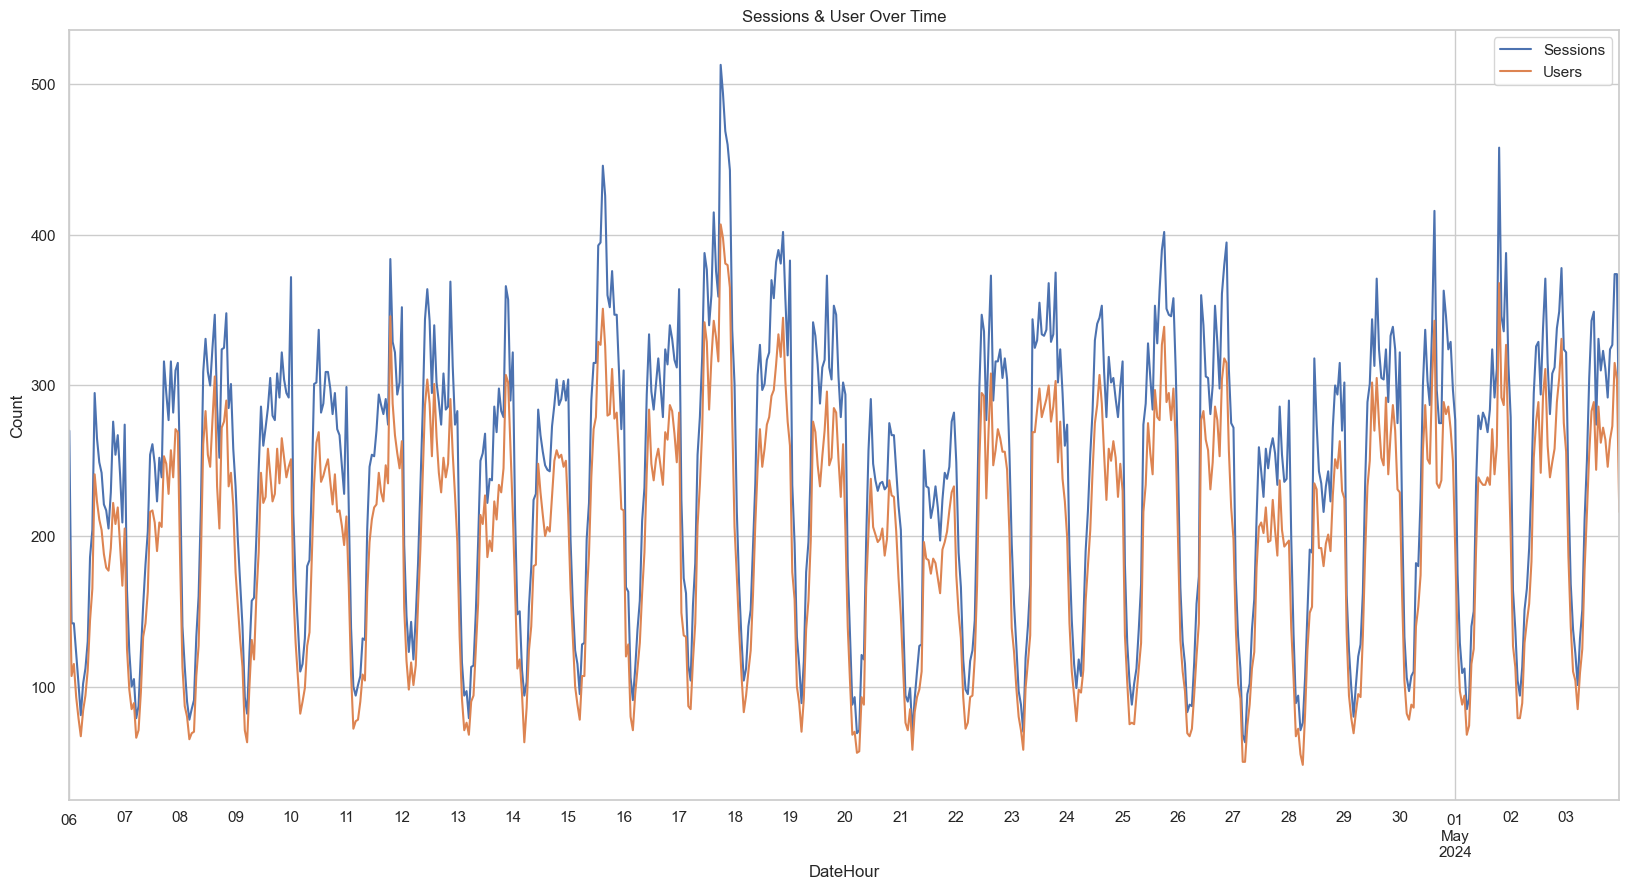

In [13]:
plt.figure(figsize = (20,10))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions & User Over Time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

## **Total User By Channel**

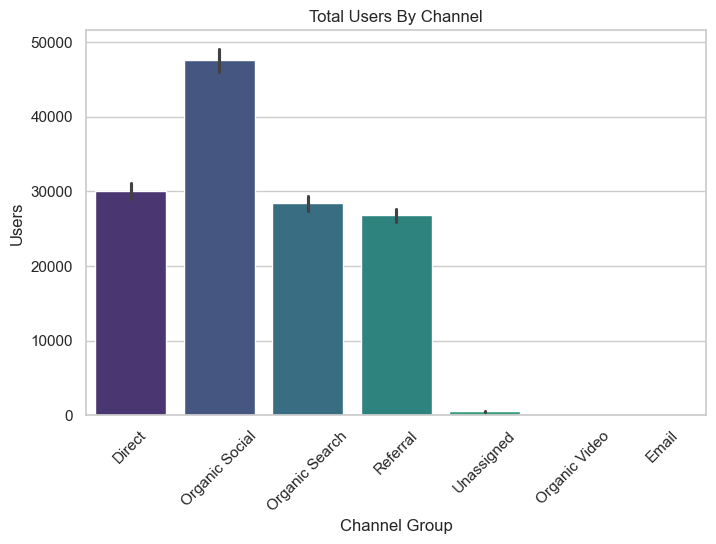

In [14]:
plt.figure(figsize = (8,5))
sns.barplot(data=df,x="Channel Group", y="Users",estimator=np.sum,hue="Channel Group",legend=False,palette="viridis")
plt.title("Total Users By Channel")
plt.xticks(rotation=45)
plt.show()

### **Average Engagement By Channel**

Text(0.5, 1.0, 'Average Engagement By Channel')

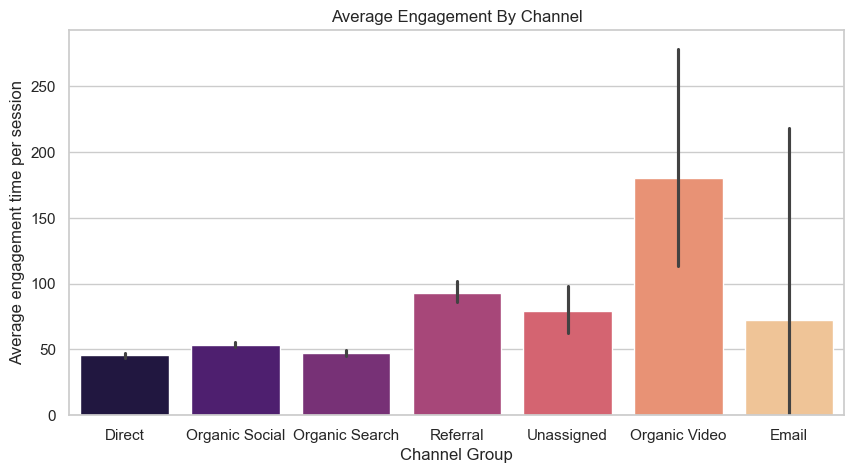

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x="Channel Group",y="Average engagement time per session",estimator=np.mean,hue="Channel Group",palette="magma")
plt.title("Average Engagement By Channel")

### **Engagement Rate Distribution By Channel**

<Axes: xlabel='Channel Group', ylabel='Engagement rate'>

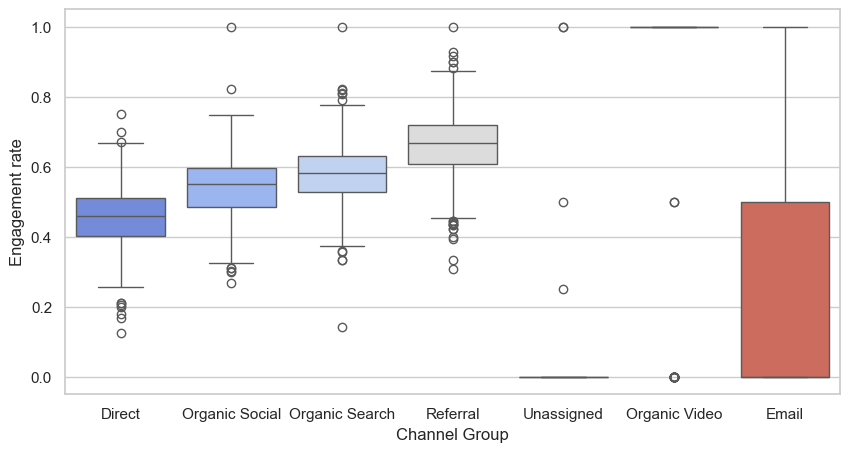

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Channel Group", y="Engagement rate",hue="Channel Group", palette="coolwarm", legend=False)

### **Engaged V/S Non Engaged User**

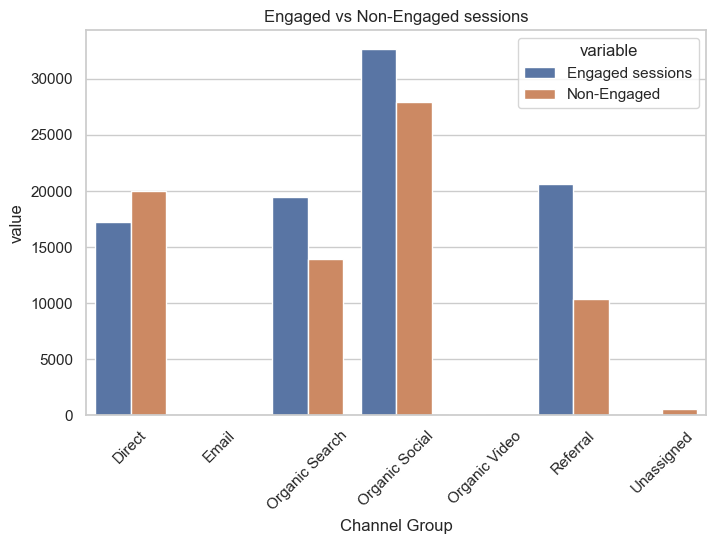

In [17]:
session_df = df.groupby("Channel Group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="Channel Group", value_vars=["Engaged sessions", "Non-Engaged"])

plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="Channel Group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged sessions")
plt.xticks(rotation=45)
plt.show()

## **Traffic By Hour & Channel**

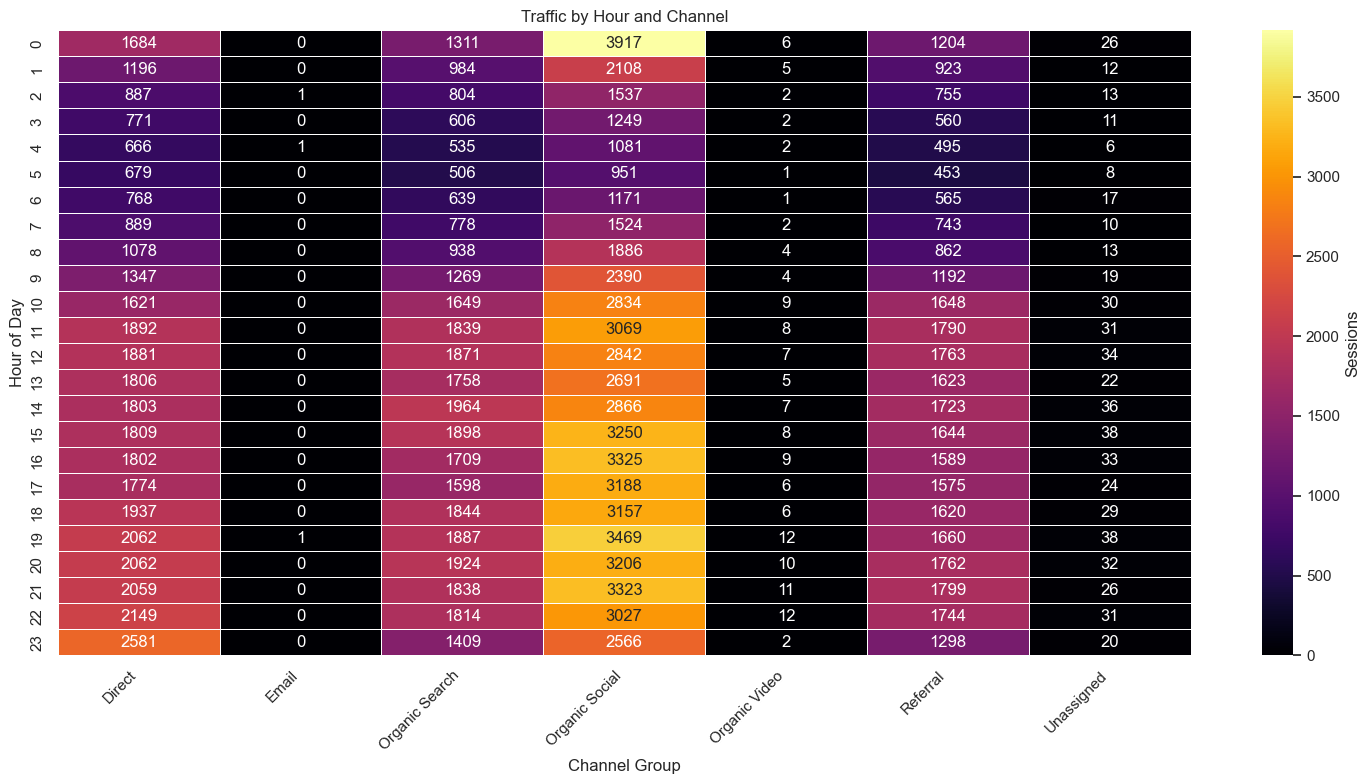

In [18]:
heatmap_data = df.groupby(["Hour", "Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data,cmap='inferno',linewidths=0.5,annot=True,fmt='.0f',cbar_kws={'label': 'Sessions'})
plt.title('Traffic by Hour and Channel')
plt.xlabel('Channel Group')
plt.ylabel('Hour of Day')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Engagement Rate V/s Session Over Time**

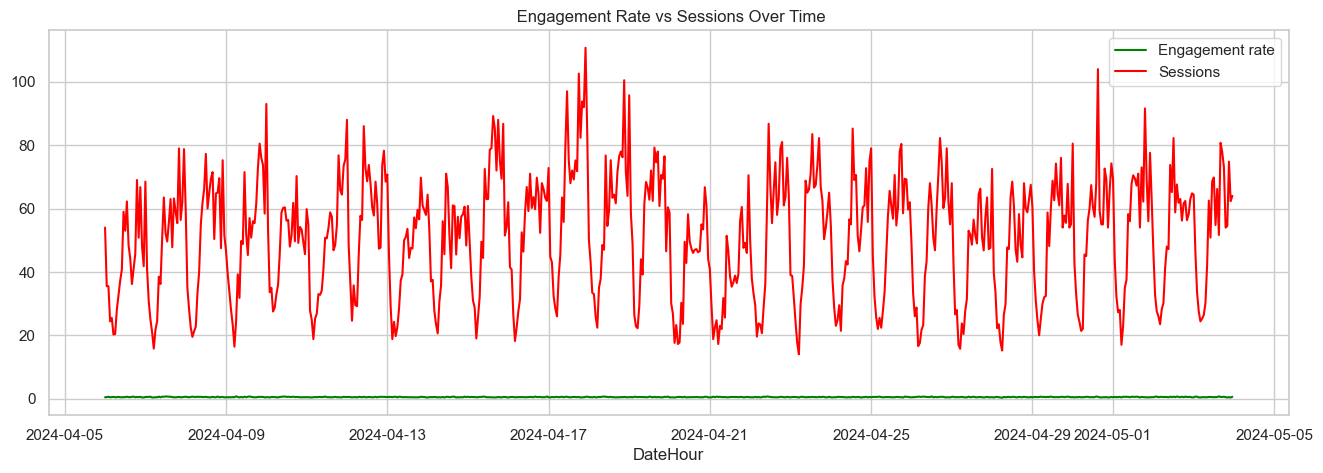

In [22]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(16, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="red")
plt.title(" Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()